# Notebook Challenge 3: naar multiagent systemen

## 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
from loan.batchrunner import run_batch
import loan.helpers as helpl 

df = run_batch()

0it [00:00, ?it/s]BatchRunner MP will use 8 processors.
1400it [00:25, 54.60it/s]


In [3]:
df.head()

,factory_location,N,helper_type,Run,End time,Hitpoints,Ill vertices,Vertices healed
0,1,1,helperagent,0,55,0,"[12, 14, 7]",6
383,5,8,helperagent,0,72,-1,"[12, 6, 14, 9]",10
387,5,8,greedyhelperagent,0,90,-1,"[9, 7, 12, 6]",4
398,6,1,helperagent,0,64,-2,"[14, 12, 9, 5]",8
408,6,1,greedyhelperagent,0,70,-2,"[11, 9, 6, 4]",5


In [4]:
df.groupby(["helper_type", "factory_location"]).mean().sort_values(["End time"], ascending=False)

N  Run  End time  Hitpoints  \
helper_type       factory_location                                   
helperagent       8                 3.75  4.5    81.875      8.025   
                  3                 3.75  4.5    80.275     16.125   
                  9                 3.75  4.5    80.025      7.250   
                  6                 3.75  4.5    80.000     10.775   
                  7                 3.75  4.5    79.850      4.250   
                  5                 3.75  4.5    78.675      2.400   
                  13                3.75  4.5    78.600      1.550   
                  2                 3.75  4.5    76.075      6.375   
                  12                3.75  4.5    75.725      1.950   
                  10                3.75  4.5    75.500      2.850   
                  14                3.75  4.5    75.200      4.100   
                  4                 3.75  4.5    73.800      2.750   
                  11                3.75  4.5    71.600     -0.525   
greedyhelperagent 7                 3.75  4.5    71.275     -1.775   
                  9                 3.75  4.5    70.125     -1.800   
                  8                 3.75  4.5    69.550     -1.450   
                  3                 3.75  4.5    69.075     -1.625   
                  10                3.75  4.5    68.425     -1.675   
                  6                 3.75  4.5    68.175     -1.275   
                  2                 3.75  4.5    67.750     -1.475   
                  5                 3.75  4.5    67.750     -1.325   
                  11                3.75  4.5    66.900     -1.450   
                  13                3.75  4.5    66.825     -1.325   
                  14                3.75  4.5    66.425     -1.425   
                  12                3.75  4.5    65.825     -1.275   
                  4                 3.75  4.5    65.575     -1.350   
helperagent       1                 3.75  4.5    65.475      2.325   
greedyhelperagent 1                 3.75  4.5    63.700     -1.250   

                                    Vertices healed  
helper_type       factory_location                   
helperagent       8                          12.475  
                  3                          10.475  
                  9                          11.475  
                  6                          11.925  
                  7                          11.450  
                  5                          10.750  
                  13                         10.900  
                  2                           9.500  
                  12                          9.650  
                  10                         10.225  
                  14                          9.475  
                  4                           9.475  
                  11                          9.525  
greedyhelperagent 7                           5.575  
                  9                           6.050  
                  8                           6.475  
                  3                           6.250  
                  10                          5.725  
                  6                           6.875  
                  2                           6.425  
                  5                           6.725  
                  11                          6.075  
                  13                          5.650  
                  14                          5.000  
                  12                          5.350  
                  4                           5.175  
helperagent       1                           7.100  
greedyhelperagent 1                           4.650

## Plotten van de resultaten
Allereerst wordt de representatie van het lichaam getoond.

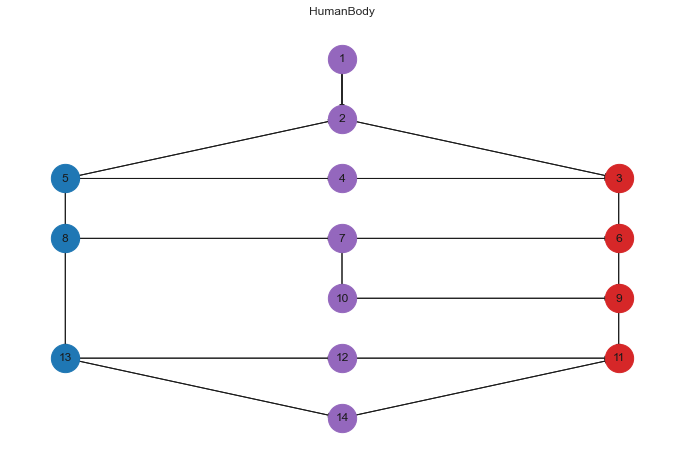

In [7]:
graph = helpl.graph_from_json(r"./loan/data/network.json")
plt.figure(figsize=(12,8))
helpl.plot_graph(graph)

### plotting the results of the experiment

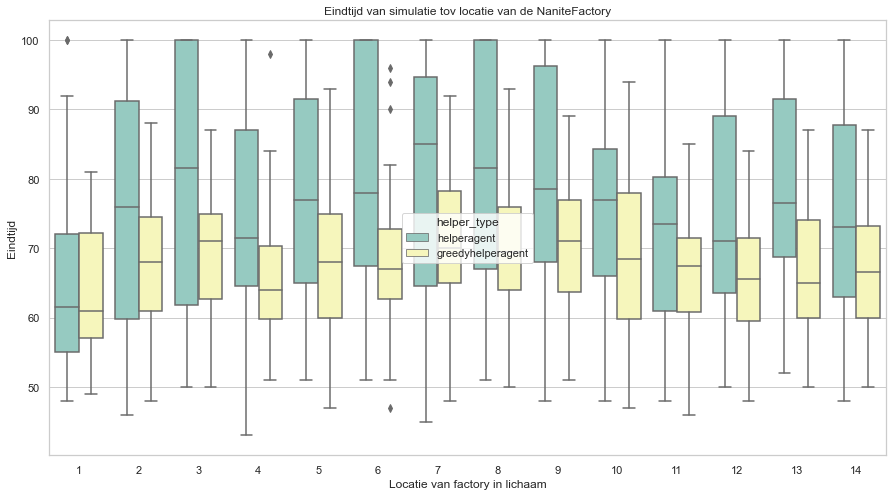

In [6]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x="factory_location", y="End time", hue="helper_type",
                 data=df, palette="Set3")
ax.set_title("Eindtijd van simulatie tov locatie van de NaniteFactory")
ax.set_xlabel("Locatie van factory in lichaam")
ax.set_ylabel("Eindtijd")
plt.show()